In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [3]:
import seaborn as sns

In [4]:
from avgn.dataset_names import species_dict

In [5]:
hopkins_dfs = list(DATA_DIR.glob('clusterability/convex_sample_indvs/*.pickle'))
hopkins_dfs[:3]

[PosixPath('/mnt/cube/tsainbur/Projects/github_repos/avgn_paper/data/clusterability/convex_sample_indvs/indvs_ s08.pickle'),
 PosixPath('/mnt/cube/tsainbur/Projects/github_repos/avgn_paper/data/clusterability/convex_sample_indvs/indvs_ AGO.pickle'),
 PosixPath('/mnt/cube/tsainbur/Projects/github_repos/avgn_paper/data/clusterability/convex_sample_indvs/katahira_white_munia_segmented_ WM35.pickle')]

In [6]:
clusterability_df = pd.concat([pd.read_pickle(i) for i in tqdm(hopkins_dfs)])

In [7]:
len(clusterability_df)

291

In [8]:
clusterability_df[:3]

,df,dataset,indv,umap_hopkins_1,umap_hopkins_10,nex
0,/mnt/cube/tsainbur/Projects/github_repos/avgn_...,buckeye,s08,0.926159,0.939742,22728
0,/mnt/cube/tsainbur/Projects/github_repos/avgn_...,BIRD_DB_Vireo_cassinii,AGO,0.987790,0.988549,4595
0,/mnt/cube/tsainbur/Projects/github_repos/avgn_...,katahira_white_munia_segmented,WM35,0.981893,0.967158,2290


In [10]:
clusterability_df['species'] = [species_dict[ds]['species']  for ds in clusterability_df['dataset'].values]
clusterability_df['family'] = [species_dict[ds]['group']  for ds in clusterability_df['dataset'].values]

In [23]:
clusterability_df[:3]

,df,dataset,indv,umap_hopkins_1,umap_hopkins_10,nex,species,family,hopkins_inverse
0,/mnt/cube/tsainbur/Projects/github_repos/avgn_...,buckeye,s08,0.926159,0.939742,22728,Human (English),mammal,0.060258
0,/mnt/cube/tsainbur/Projects/github_repos/avgn_...,BIRD_DB_Vireo_cassinii,AGO,0.987790,0.988549,4595,Cassin's vireo,songbird,0.011451
0,/mnt/cube/tsainbur/Projects/github_repos/avgn_...,katahira_white_munia_segmented,WM35,0.981893,0.967158,2290,White-rumped munia,songbird,0.032842


In [11]:
from avgn.utils.general import save_fig
from avgn.utils.paths import FIGURE_DIR, ensure_dir

In [12]:
ensure_dir(FIGURE_DIR / 'hopkins')

In [25]:
clusterability_df['hopkins'] = 1 - clusterability_df['umap_hopkins_10']

(13.75, -0.5)

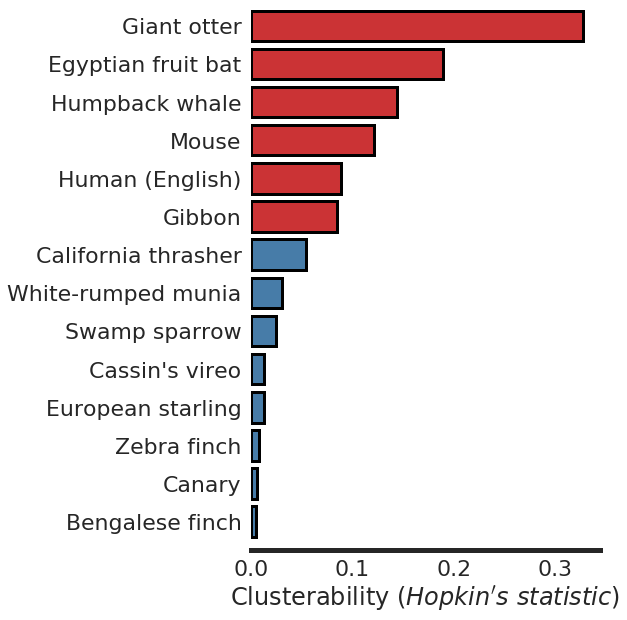

In [21]:
sns.set(style='white', font_scale=2)

metric = 'umap_hopkins_10'
fig, ax = plt.subplots(ncols=1, figsize=(6.25, 10))

# log scale
result = clusterability_df.groupby(["species", 'family'])[metric].aggregate(
    np.mean).reset_index().sort_values(metric)#, ascending=False)
result[metric] = (1 - result[metric])

# create bar chart
bar = sns.barplot(
    x=metric,
    y="species",
    hue='family',
    dodge=False,
    data=result,
    ax=ax,
    linewidth=3,
    edgecolor="0",
    order=result['species'],
    #log=True,
    #width = 1,
    palette = sns.color_palette('Set1')
)
ax.set_xlabel('Clusterability ($\it{Hopkin\'s\ statistic}$)', fontsize=24)
ax.set_ylabel('')
ax.get_legend().remove()

for axis in ['top','left','right']:
    ax.spines[axis].set_linewidth(0)
ax.spines['bottom'].set_linewidth(5)
#ax.set_xscale('log')

ylim = ax.get_ylim()
ax.set_ylim([ylim[0]+.25, ylim[1]])
#ax.set_xlim([0.5,1])

#save_fig(FIGURE_DIR / 'hopkins' / ('hopkins_comparison_indv_'+ metric), dpi=300, save_jpg=False, save_png=True, save_pdf=True)

In [97]:
metric

'umap_hopkins_10'

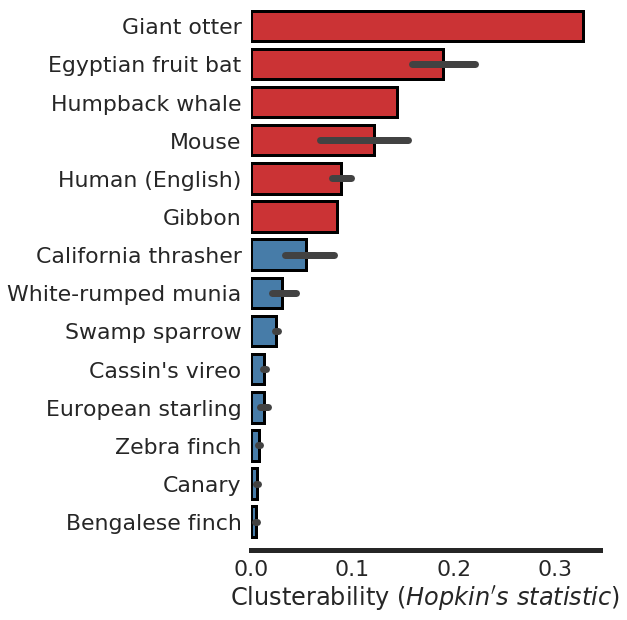

In [98]:
fig, ax = plt.subplots(ncols=1, figsize=(6.25, 10))


# create bar chart
bar = sns.barplot(
    x="hopkins",
    y="species",
    hue='family',
    dodge=False,
    data=clusterability_df,
    ax=ax,
    linewidth=3,
    edgecolor="0",
    order=result['species'],
    #log=True,
    #width = 1,
    palette = sns.color_palette('Set1')
)

for l in ax.lines:
    #print(l.get_linewidth())
    plt.setp(l,linewidth=7)

ax.set_xlabel('Clusterability ($\it{Hopkin\'s\ statistic}$)', fontsize=24)
ax.set_ylabel('')
ax.get_legend().remove()

for axis in ['top','left','right']:
    ax.spines[axis].set_linewidth(0)
ax.spines['bottom'].set_linewidth(5)
#ax.set_xscale('log')

ylim = ax.get_ylim()
ax.set_ylim([ylim[0]+.25, ylim[1]])
#ax.set_xlim([0.5,1])
save_fig(FIGURE_DIR / 'hopkins' / ('hopkins_comparison_indv_'+ metric), dpi=300, save_jpg=False, save_png=True, save_pdf=True)

In [31]:
%load_ext rpy2.ipython

In [52]:
cdf = clusterability_df[['indv', 'nex', 'species', 'family', 'hopkins']]
cdf = cdf[cdf.species.isin(['Giant otter', 'Gibbon']) == False]
cdf[:3]

,indv,nex,species,family,hopkins
0,s08,22728,Human (English),mammal,0.060258
0,AGO,4595,Cassin's vireo,songbird,0.011451
0,WM35,2290,White-rumped munia,songbird,0.032842


In [75]:
len(cdf)

289

In [53]:
cdf.species.unique()

array(['Human (English)', "Cassin's vireo", 'White-rumped munia',
       'Bengalese finch', 'Swamp sparrow', 'Egyptian fruit bat',
       'Zebra finch', 'European starling', 'Canary', 'Mouse',
       'California thrasher', 'Humpback whale'], dtype=object)

In [95]:
%%R -i cdf
library('lme4')
cdf$nex.z <- (cdf$nex - mean(cdf$nex))/sd(cdf$nex)
m0 <- lmer(log(hopkins) ~ nex.z + (1| species), data=cdf, REML=F)
m1 <- lmer(log(hopkins) ~ family + nex.z + (1| species), data=cdf, REML=F)
anova(m0,m1, test= 'Chisq')

Data: cdf
Models:
m0: log(hopkins) ~ nex.z + (1 | species)
m1: log(hopkins) ~ family + nex.z + (1 | species)
   npar    AIC    BIC  logLik deviance  Chisq Df Pr(>Chisq)    
m0    4 435.86 450.53 -213.93   427.86                         
m1    5 417.85 436.19 -203.93   407.85 20.007  1  7.714e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
#7.714e-06

### Save for paper

In [99]:
clusterability_df[:3]

,df,dataset,indv,umap_hopkins_1,umap_hopkins_10,nex,species,family,hopkins_inverse,hopkins
0,/mnt/cube/tsainbur/Projects/github_repos/avgn_...,buckeye,s08,0.926159,0.939742,22728,Human (English),mammal,0.060258,0.060258
0,/mnt/cube/tsainbur/Projects/github_repos/avgn_...,BIRD_DB_Vireo_cassinii,AGO,0.987790,0.988549,4595,Cassin's vireo,songbird,0.011451,0.011451
0,/mnt/cube/tsainbur/Projects/github_repos/avgn_...,katahira_white_munia_segmented,WM35,0.981893,0.967158,2290,White-rumped munia,songbird,0.032842,0.032842


In [101]:
ensure_dir(DATA_DIR / "paper_data" / "hopkins_species_comparison" )
clusterability_df.to_pickle(DATA_DIR / "paper_data" / "hopkins_species_comparison" / "all_species.pickle")

In [102]:
pd.__version__

'0.25.3'